In [1]:
# Astro 120 tutorial, 9/6

# General overview of histograms and other plotting functions
# that may come in handy in this lab and future labs :)

#-------------------------------------------------------------

# Import functions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
#-------------------------------------------------------------

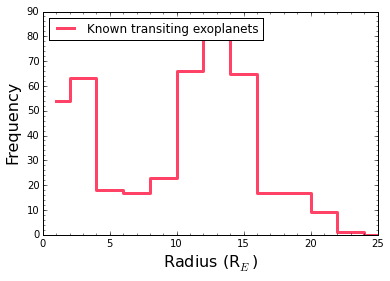

In [24]:
filename = 'planet_list_astro120.txt'

# Load each column from the file into a separate array
names = np.loadtxt(filename, dtype='string', skiprows=1, delimiter='\t', usecols=(0,))
radii = np.loadtxt(filename, dtype='float', skiprows=1, delimiter='\t', usecols=(1,))
masses = np.loadtxt(filename, skiprows=1, delimiter='\t', usecols=(2,))
T_eff_host_star = np.loadtxt(filename, skiprows=1, delimiter='\t', usecols=(3,))
transit_durations = np.loadtxt(filename, skiprows=1, delimiter='\t', usecols=(4,))

# Produce bins for the histogram
bins = np.arange(0, 28, 2)

# Use the np.where function to find the frequency of each planet size category
frequency = np.array([])
for i in range(len(bins)-1):
    count = np.where((radii > bins[i]) & (radii < bins[i+1]))[0].size
    frequency = np.append(frequency, count)

# Find the width of each bin
bin_width = bins[2] - bins[1]

# Use the bin width to find the center of each bin
bin_centers = bins[0:-1] + 0.5 * bin_width

# Initiate a figure for the plot
fig = plt.figure()

# Plot the first histogram of planet sizes using a hex color
plt.plot(bin_centers, frequency, drawstyle='steps-mid', color="#ff4265", linewidth=3.0, label='Known transiting exoplanets')

# Set minor locator on the x-axis; increments of 1
minorLocator_x = MultipleLocator(1)
plt.axes().xaxis.set_minor_locator(minorLocator_x)

# Set minor locator on the y-axis; increments of 2
minorLocator_y = MultipleLocator(2)
plt.axes().yaxis.set_minor_locator(minorLocator_y)

plt.xlabel('Radius (R$_E$)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.legend(loc=2)

plt.show()


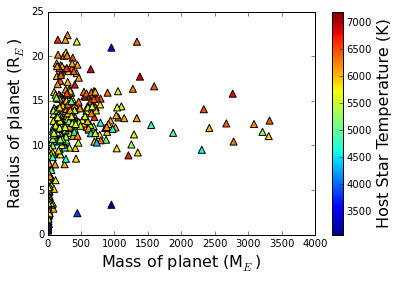

In [6]:
plt.figure()

# Choose the color map for the plot
cmap = plt.cm.get_cmap('jet')

plt.scatter(masses, radii, c=T_eff_host_star, vmin=3070, vmax=7200, s=50, marker='^', cmap=cmap)
plt.xlim(0,4000)
plt.ylim(0,25)

plt.xlabel('Mass of planet (M$_E$)', fontsize=16)
plt.ylabel('Radius of planet (R$_E$)', fontsize=16)

# Uncomment this if you want to customize the location of your colorbar
#cax = plt.axes([0.92, 0.1, 0.025, 0.8])
#h = plt.colorbar(cax=cax)

h = plt.colorbar()
h.set_label('Host Star Temperature (K)', fontsize=16)
fig.set_size_inches(15, 6)
plt.show()

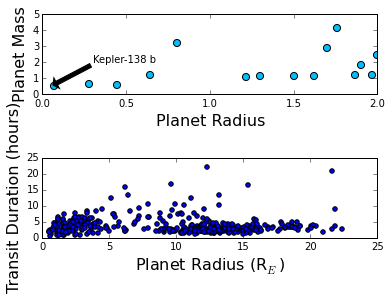

In [25]:
# Create two subplots

# First subplot
fig = plt.figure()

# Add the first subplot to your figure
ax1 = fig.add_subplot(211)

plt.scatter(masses, radii, facecolors="deepskyblue", edgecolors="k", s=50)
plt.xlim(0,2)
plt.ylim(0,5)

plt.xlabel('Planet Radius', fontsize=16)
plt.ylabel('Planet Mass', fontsize=16)

# Add annotation to the plot; here, an arrow pointing to a specific planet and labeling it
ax1.annotate('Kepler-138 b', xy=(0.05, 0.5), xytext=(0.3,2), arrowprops=dict(facecolor='black', shrink=0.05))

# Second subplot
ax2 = fig.add_subplot(212)

# Convert transit duration from seconds to hours

transit_durations = np.array(transit_durations) / 3600.
plt.scatter(radii, transit_durations)

plt.xlim(0,25)
plt.ylim(0,25)

plt.xlabel('Planet Radius (R$_E$)', fontsize=16)
plt.ylabel('Transit Duration (hours)', fontsize=16)

# Automatically adjust the spacing between the subplots before saving
plt.subplots_adjust(hspace=0.8)
plt.show()